In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


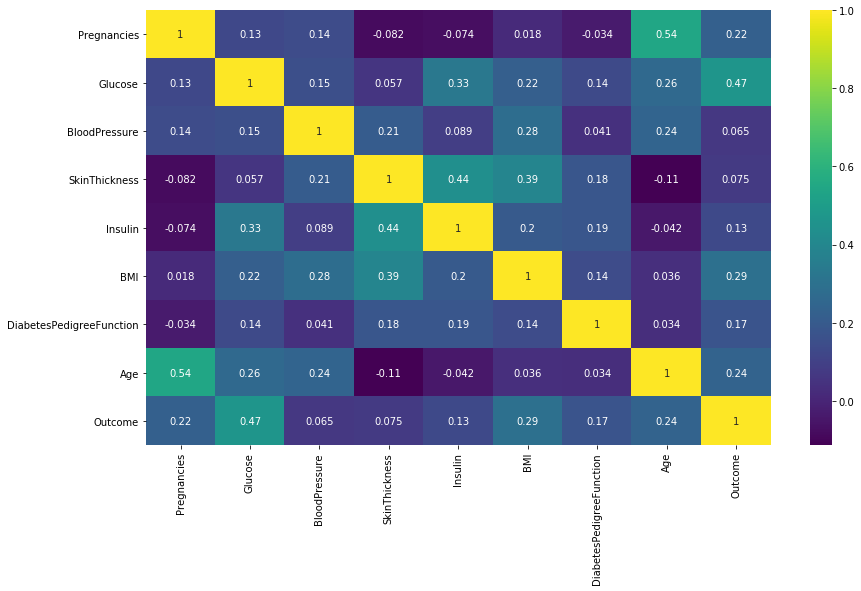

In [6]:
plt.figure(figsize=(14,8))
corr = df.corr()
sns.heatmap(corr,cmap='viridis',annot=True)

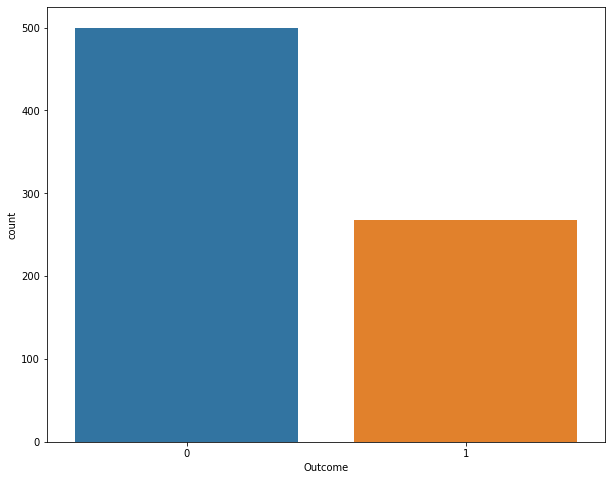

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outcome'])

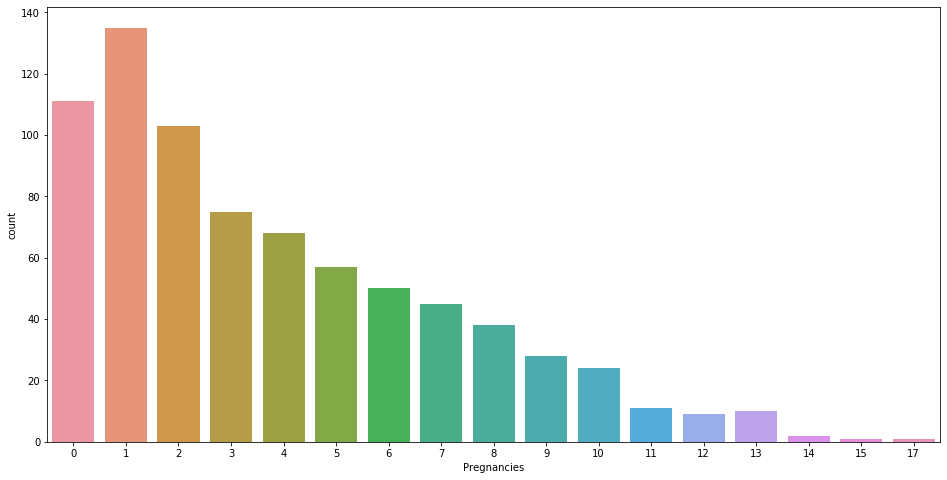

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(df['Pregnancies'])

In [9]:
(df['Pregnancies'] == 17).sum()

1

In [10]:
(df['Pregnancies'] == 14).sum()

2

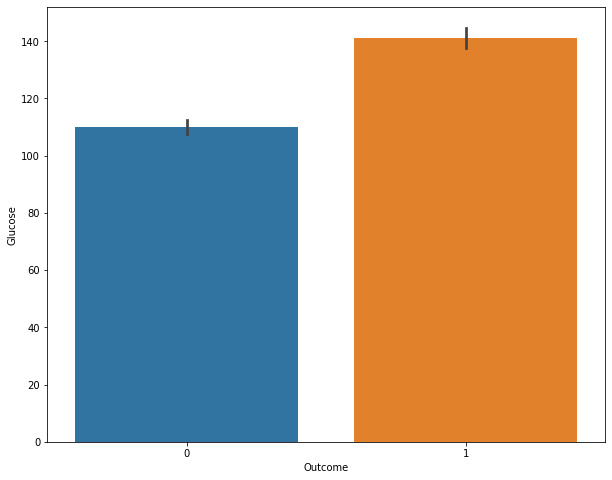

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='Outcome',y='Glucose',data=df)

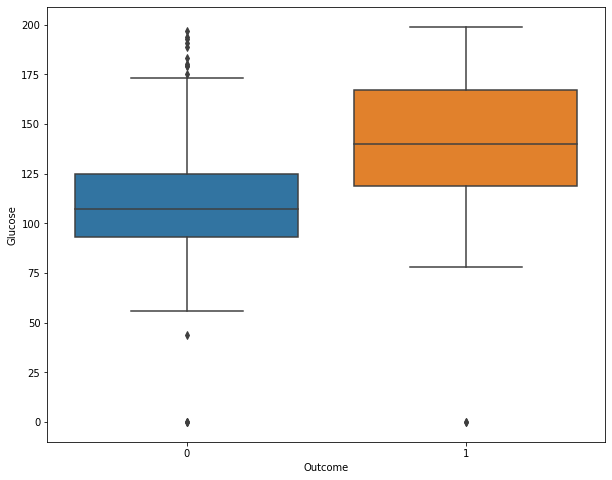

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outcome',y='Glucose',data=df)

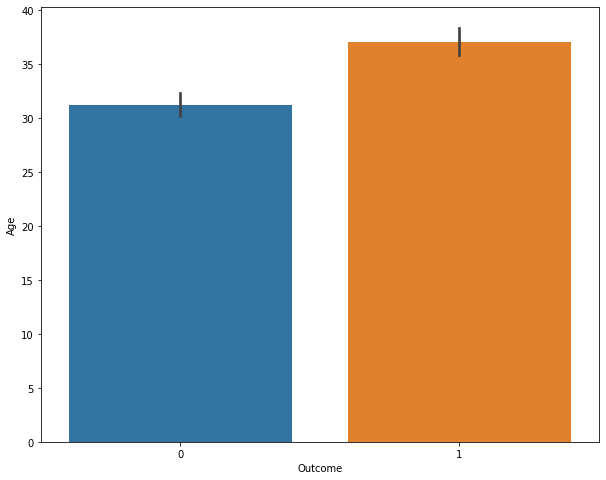

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x='Outcome',y='Age',data=df)

In [14]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense

In [21]:
X_train.shape

(614, 8)

In [22]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
stop = EarlyStopping(patience=5)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [26]:
model.fit(X_train,y_train,
        epochs=200,
        validation_data=(X_test,y_test),
        callbacks=[stop])

Train on 614 samples, validate on 154 samples
Epoch 1/200
614/614 [==============================] - 1s 2ms/sample - loss: 0.6911 - val_loss: 0.6894
Epoch 2/200
614/614 [==============================] - 0s 162us/sample - loss: 0.6872 - val_loss: 0.6858
Epoch 3/200
614/614 [==============================] - 0s 163us/sample - loss: 0.6833 - val_loss: 0.6820
Epoch 4/200
614/614 [==============================] - 0s 151us/sample - loss: 0.6792 - val_loss: 0.6783
Epoch 5/200
614/614 [==============================] - 0s 150us/sample - loss: 0.6747 - val_loss: 0.6734
Epoch 6/200
614/614 [==============================] - 0s 175us/sample - loss: 0.6687 - val_loss: 0.6688
Epoch 7/200
614/614 [==============================] - 0s 169us/sample - loss: 0.6625 - val_loss: 0.6645
Epoch 8/200
614/614 [==============================] - 0s 157us/sample - loss: 0.6587 - val_loss: 0.6617
Epoch 9/200
614/614 [==============================] - 0s 153us/sample - loss: 0.6556 - val_loss: 0.6611
Epoch 10/20

Epoch 78/200
614/614 [==============================] - 0s 154us/sample - loss: 0.4815 - val_loss: 0.5287
Epoch 79/200
614/614 [==============================] - 0s 159us/sample - loss: 0.4833 - val_loss: 0.5281
Epoch 80/200
614/614 [==============================] - 0s 150us/sample - loss: 0.4788 - val_loss: 0.5255
Epoch 81/200
614/614 [==============================] - 0s 152us/sample - loss: 0.4789 - val_loss: 0.5245
Epoch 82/200
614/614 [==============================] - 0s 148us/sample - loss: 0.4790 - val_loss: 0.5312
Epoch 83/200
614/614 [==============================] - 0s 145us/sample - loss: 0.4821 - val_loss: 0.5258
Epoch 84/200
614/614 [==============================] - 0s 146us/sample - loss: 0.4775 - val_loss: 0.5282
Epoch 85/200
614/614 [==============================] - 0s 162us/sample - loss: 0.4782 - val_loss: 0.5275
Epoch 86/200
614/614 [==============================] - 0s 146us/sample - loss: 0.4789 - val_loss: 0.5251


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  72        
_________________________________________________________________
dense_1 (Dense)              multiple                  72        
_________________________________________________________________
dense_2 (Dense)              multiple                  72        
_________________________________________________________________
dense_3 (Dense)              multiple                  36        
_________________________________________________________________
dense_4 (Dense)              multiple                  20        
_________________________________________________________________
dense_5 (Dense)              multiple                  5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
__________________________________________________________

In [28]:
history = pd.DataFrame(model.history.history)

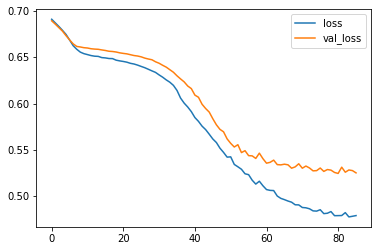

In [29]:
history.plot()

In [30]:
predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(accuracy_score,)